Q2: Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [3]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
crime = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/assignments/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [6]:
crime = crime.rename({'Murder':'MURDER','Assault':'ASSAULT','UrbanPop':'URBAN_POP','Rape':'RAPE'},axis = 1)

In [7]:
crime

,MURDER,ASSAULT,URBAN_POP,RAPE
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MURDER     50 non-null     float64
 1   ASSAULT    50 non-null     int64  
 2   URBAN_POP  50 non-null     int64  
 3   RAPE       50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


HIERARCHIAL CLUSTERING

In [9]:
def norm_func(i):
  x = (i - i.min())/(i.max()-i.min())
  return (x)

In [10]:
df_norm = norm_func(crime)

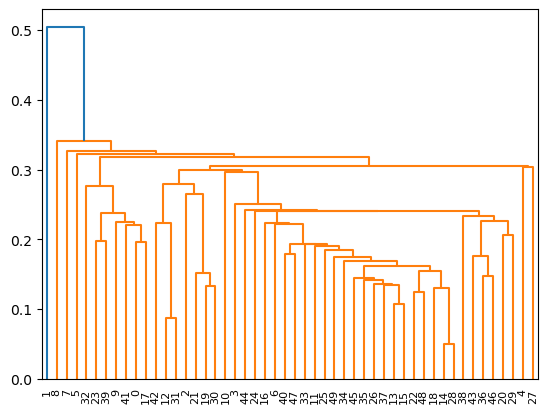

In [11]:
dendogram = sch.dendrogram(sch.linkage(df_norm,method='single'))

In [12]:
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean', linkage = 'single')

In [13]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
crime['H_CLUSTERID'] = hc.labels_
crime

,MURDER,ASSAULT,URBAN_POP,RAPE,H_CLUSTERID
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


K MEANS

In [15]:
from sklearn.cluster import KMeans

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


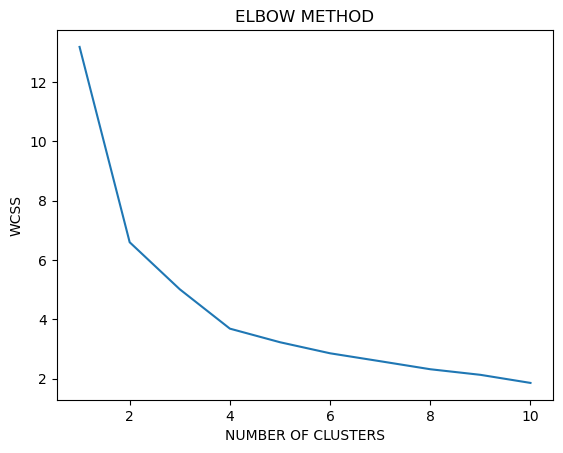

In [16]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,random_state = 0)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [17]:
#building cluster algorithm
clusters_new = KMeans(4,random_state = 42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [18]:
clusters_new.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [19]:
crime['CLUSTERID_NEW'] = clusters_new.labels_


In [20]:
#standardized values are
clusters_new.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [21]:
crime.groupby('CLUSTERID_NEW').agg(['mean']).reset_index()

,CLUSTERID_NEW,MURDER,ASSAULT,URBAN_POP,RAPE,H_CLUSTERID
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,0.000000
1,1,10.966667,264.000000,76.500000,33.608333,0.416667
2,2,13.937500,243.625000,53.750000,21.412500,0.000000
3,3,5.852941,141.176471,73.647059,19.335294,0.058824


In [22]:
crime

,MURDER,ASSAULT,URBAN_POP,RAPE,H_CLUSTERID,CLUSTERID_NEW
0,13.2,236,58,21.2,0,2
1,10.0,263,48,44.5,3,1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,0,2
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
6,3.3,110,77,11.1,0,3
7,5.9,238,72,15.8,1,3
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,0,2


DB SCAN

In [23]:
from sklearn.preprocessing import StandardScaler
crime_norm = StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927e+00,  7.90787158e-01, -5.26195142e-01,
        -3.45115891e-03, -2.32845158e-01,  3.49563319e-01],
       [ 5.13018579e-01,  1.11805959e+00, -1.22406668e+00,
         2.50942392e+00,  5.58828379e+00, -4.82730297e-01],
       [ 7.23606675e-02,  1.49381682e+00,  1.00912225e+00,
         1.05346626e+00, -2.32845158e-01, -4.82730297e-01],
       [ 2.34708319e-01,  2.33211909e-01, -1.08449238e+00,
        -1.86793976e-01, -2.32845158e-01,  3.49563319e-01],
       [ 2.81093362e-01,  1.27563520e+00,  1.77678094e+00,
         2.08881393e+00, -2.32845158e-01, -4.82730297e-01],
       [ 2.59756242e-02,  4.02908724e-01,  8.69547941e-01,
         1.88390137e+00, -2.32845158e-01, -4.82730297e-01],
       [-1.04088037e+00, -7.36484178e-01,  7.99760786e-01,
        -1.09272319e+00, -2.32845158e-01,  1.18185693e+00],
       [-4.37874809e-01,  8.15029561e-01,  4.50825016e-01,
        -5.85834225e-01,  1.70753116e+00,  1.18185693e+00],
       [ 1.76541475e+00,  1.99078607e+00,  1.009

In [24]:
#DBSCAN CLUSTERING
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples = 4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [25]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  1, -1,  2,  1,  2,  1,
        0,  1, -1,  3, -1,  1, -1,  2,  1,  1, -1,  1,  3, -1, -1, -1,  1,
        2,  2,  2,  2,  3,  0,  1,  0, -1,  2,  1,  2,  2,  1,  1,  2],
      dtype=int64)

In [26]:
crime['CLUSTERS'] = dbscan.labels_
crime

,MURDER,ASSAULT,URBAN_POP,RAPE,H_CLUSTERID,CLUSTERID_NEW,CLUSTERS
0,13.2,236,58,21.2,0,2,0
1,10.0,263,48,44.5,3,1,-1
2,8.1,294,80,31.0,0,1,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,0,1,-1
5,7.9,204,78,38.7,0,1,-1
6,3.3,110,77,11.1,0,3,2
7,5.9,238,72,15.8,1,3,-1
8,15.4,335,80,31.9,2,1,-1
9,17.4,211,60,25.8,0,2,-1


In [27]:
crime.groupby('CLUSTERS').agg(['mean']).reset_index()

,CLUSTERS,MURDER,ASSAULT,URBAN_POP,RAPE,H_CLUSTERID,CLUSTERID_NEW
,,mean,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,0.333333,1.444444
1,0,14.050000,238.000000,57.750000,23.200000,0.000000,2.000000
2,1,3.600000,78.538462,52.076923,12.176923,0.000000,0.000000
3,2,6.091667,136.166667,69.666667,20.775000,0.000000,3.000000
4,3,5.066667,160.666667,87.000000,14.466667,0.000000,3.000000
